In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [ ]:
img_rows, img_cols=28, 28

if k.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  inpx = (1, img_rows, img_cols)

else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  inpx = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [ ]:

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
inpx_shape = (img_rows, img_cols, 1)
inpx = Input(shape=inpx_shape)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.7)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)

In [ ]:
model = Model([inpx], layer7)
model.compile(optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=128)

Epoch 1/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 179s 378ms/step - accuracy: 0.9621 - loss: 0.1273
Epoch 2/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 207s 389ms/step - accuracy: 0.9637 - loss: 0.1228
Epoch 3/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 191s 366ms/step - accuracy: 0.9636 - loss: 0.1239
Epoch 4/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 212s 386ms/step - accuracy: 0.9616 - loss: 0.1271


In [ ]:
pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step


In [ ]:
import matplotlib.pyplot as plt

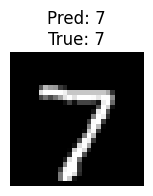

In [ ]:
plt.figure(figsize=(10, 2))
for i in range(1):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(pred[i])}\nTrue: {np.argmax(y_test[i])}")
    plt.axis('off')

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 0.0782979279756546
accuracy= 0.9761999845504761
